In [1]:
from qiskit_ibm_provider import IBMProvider
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from qiskit import pulse, IBMQ, QuantumCircuit, transpile, schedule
from qiskit.pulse import transforms, Acquire, AcquireChannel, MemorySlot, Schedule, Play, library
from qiskit.circuit import Gate
from qiskit.pulse.library import Gaussian

provider = IBMProvider(name="dev-iqp")
backend = provider.get_backend("test_whiplash")
pi=np.pi

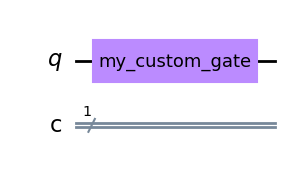

In [2]:
#Step 1: Add custom gate to a circuit.
circ = QuantumCircuit(1, 1)
custom_gate = Gate('my_custom_gate', 1, [])
circ.append(custom_gate, [0])

circ.draw('mpl')

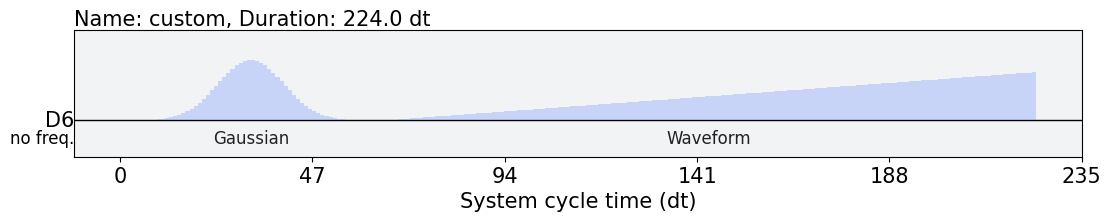

In [3]:
#Step 2: Define what the custom gate looks like as a schedule. Note the drive_channel must match the channel you ultimately
#decide to play the pulse on.
with pulse.build(backend, name='custom') as my_schedule:
    pulse.play(Gaussian(duration=64, amp=0.2, sigma=8), pulse.drive_channel(6))
    pulse.play([0.001*i for i in range(160)],pulse.drive_channel(6))

my_schedule.draw()

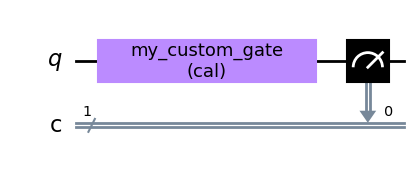

In [10]:
#Calibrate by connecting the custom schedule with the custom pulse.
circ.add_calibration('my_custom_gate', [6], my_schedule)
circ.measure(0,0)
circ.draw('mpl',idle_wires=False)

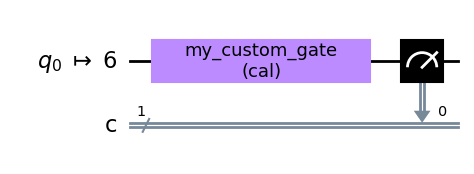

In [11]:
#Transpile the circuit, with the specified qubit you want to use indicated as the 'initial_layout' parameter.
circ_transpiled = transpile(circ, backend,initial_layout=[6])
circ_transpiled.draw('mpl', idle_wires=False)

In [ ]:
#Here, I check that it worked. Indeed, it does :)
a=schedule(circ_transpiled,backend)
a.draw()